<a href="https://colab.research.google.com/github/neel26desai/cmpe255_assignment2/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [5]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.0.4'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [4]:
# Fetch the California housing dataset
california_housing = fetch_california_housing()

# Convert it to a pandas DataFrame
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
#the target represents median house values for California districts, expressed in units of 100,000 USD. This means that a target value of 1.5 represents a median house value of 150,000 USD.
data['Target'] = california_housing.target

In [6]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment


In [7]:
exp = RegressionExperiment()

In [8]:
#set up the experiment
exp.setup(data,target="Target",session_id=500)

,Description,Value
0,Session id,500
1,Target,Target
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(14447, 9)"
6,Transformed test set shape,"(6193, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [9]:
#comparing the baseline models
baseline_model = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3158,0.2222,0.4710,0.8330,0.1429,0.1786,1.2620
xgboost,Extreme Gradient Boosting,0.3205,0.2324,0.4817,0.8251,0.1463,0.1800,1.4560
et,Extra Trees Regressor,0.3302,0.2525,0.5022,0.8100,0.1480,0.1832,2.5990
rf,Random Forest Regressor,0.3371,0.2638,0.5132,0.8016,0.1534,0.1909,6.6100
gbr,Gradient Boosting Regressor,0.3717,0.2887,0.5370,0.7831,0.1641,0.2125,2.1980
lar,Least Angle Regression,0.5313,0.5340,0.7303,0.5983,0.2241,0.3153,0.0360
lr,Linear Regression,0.5335,0.5344,0.7307,0.5981,0.2244,0.3183,0.5240
ridge,Ridge Regression,0.5335,0.5343,0.7306,0.5981,0.2244,0.3183,0.0300
br,Bayesian Ridge,0.5336,0.5343,0.7306,0.5981,0.2244,0.3183,0.0380
dt,Decision Tree Regressor,0.4717,0.5377,0.7328,0.5948,0.2155,0.2578,0.2560


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [11]:
baseline_model

LGBMRegressor(n_jobs=-1, random_state=500)

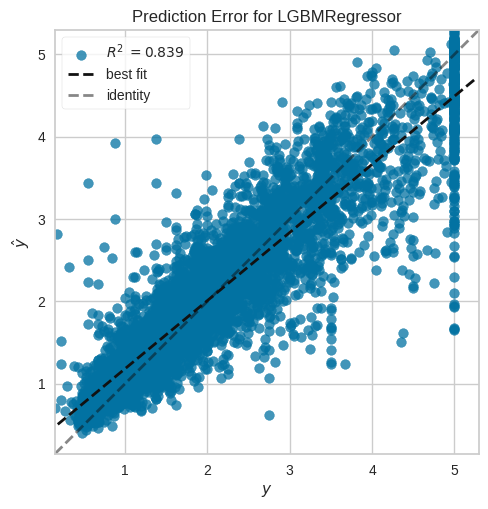

In [12]:
exp.plot_model(baseline_model,plot="error")#checking distribution between actual and distributed value

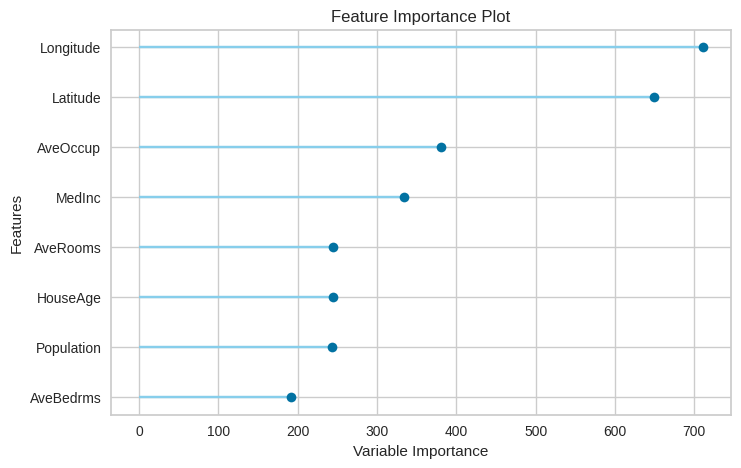

In [13]:
exp.plot_model(baseline_model,plot="feature")#checking feature importance

In [14]:

exp.evaluate_model(baseline_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
#checking how the model performs on unseen data
baseline_model_pred = exp.predict_model(baseline_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3085,0.2137,0.4623,0.8394,0.1399,0.1759


In [17]:
baseline_model_pred.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,prediction_label
9441,2.8750,13.0,5.248485,1.527273,369.0,2.236364,37.689999,-120.150002,0.70200,1.135488
2984,1.5625,36.0,5.203208,1.171123,613.0,3.278075,35.340000,-119.010002,0.46700,0.519007
8832,4.0651,33.0,3.781213,1.028538,1347.0,1.601665,34.090000,-118.370003,5.00001,4.273691
2047,6.8162,15.0,7.383621,1.060345,766.0,3.301724,36.720001,-119.720001,1.27200,1.725051
1796,1.7257,39.0,5.068355,1.053165,1166.0,2.951899,37.930000,-122.349998,0.91500,0.960086


In [19]:
#saving the mode
exp.save_model(baseline_model,'/content/drive/MyDrive/ca_housing')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                              'AveBedrms', 'Population',
                                              'AveOccup', 'Latitude',
                                              'Longitude'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=500))]),
 '/content/drive/MyDrive/ca_housing.pkl')

In [20]:
#load the saved model and use it for predicting on the entire dataset

In [21]:
from pycaret.regression import load_model, predict_model

In [22]:
model = load_model('/content/drive/MyDrive/ca_housing')
model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                             'AveBedrms', 'Population',
                                             'AveOccup', 'Latitude',
                                             'Longitude'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', LGBMRegressor(n_jobs=-1, random_state=500))])

In [23]:
#dropping the target column
df= data.drop(['Target'],axis=1)

In [29]:
#making predictions
pred = predict_model(model,data=df)
pred.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prediction_label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.880001,-122.230003,4.261620
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.860001,-122.220001,4.000363
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.849998,-122.239998,4.048139
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.849998,-122.250000,3.386385
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.849998,-122.250000,2.776128
